In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KAGGLE_USERNAME']='Your kaggle username'
os.environ['KAGGLE_KEY']='Your Kaggle Key'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

401 - Unauthorized


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

unzip:  cannot find or open covid-face-mask-detection-dataset.zip, covid-face-mask-detection-dataset.zip.zip or covid-face-mask-detection-dataset.zip.ZIP.


In [4]:
main_dir = '/content/drive/MyDrive/Lung Cancer Accuracy/Data'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')


In [5]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['000109 (5).png', '000112 (2).png', '000109 (4).png', '000108 (3).png', '000109 (2).png', '000115 (8).png', '000115.png', '000117 (4).png', '000118 (5).png', '000117 (8).png']
['24.png', '21.png', '25.png', '23.png', '24 - Copy.png', '22.png', 'normal - Copy.png', 'normal.png', '10 - Copy (2) - Copy.png', '12 (2) - Copy.png']


['/content/drive/MyDrive/Lung Cancer Accuracy/Data/Train/Mask/000109 (5).png', '/content/drive/MyDrive/Lung Cancer Accuracy/Data/Train/Mask/000112 (2).png', '/content/drive/MyDrive/Lung Cancer Accuracy/Data/Train/Mask/000109 (4).png', '/content/drive/MyDrive/Lung Cancer Accuracy/Data/Train/Mask/000108 (3).png', '/content/drive/MyDrive/Lung Cancer Accuracy/Data/Train/Mask/000109 (2).png', '/content/drive/MyDrive/Lung Cancer Accuracy/Data/Train/Mask/000115 (8).png', '/content/drive/MyDrive/Lung Cancer Accuracy/Data/Train/Mask/000115.png', '/content/drive/MyDrive/Lung Cancer Accuracy/Data/Train/Mask/000117 (4).png']
['/content/drive/MyDrive/Lung Cancer Accuracy/Data/Train/Non Mask/24.png', '/content/drive/MyDrive/Lung Cancer Accuracy/Data/Train/Non Mask/21.png', '/content/drive/MyDrive/Lung Cancer Accuracy/Data/Train/Non Mask/25.png', '/content/drive/MyDrive/Lung Cancer Accuracy/Data/Train/Non Mask/23.png', '/content/drive/MyDrive/Lung Cancer Accuracy/Data/Train/Non Mask/24 - Copy.png', '

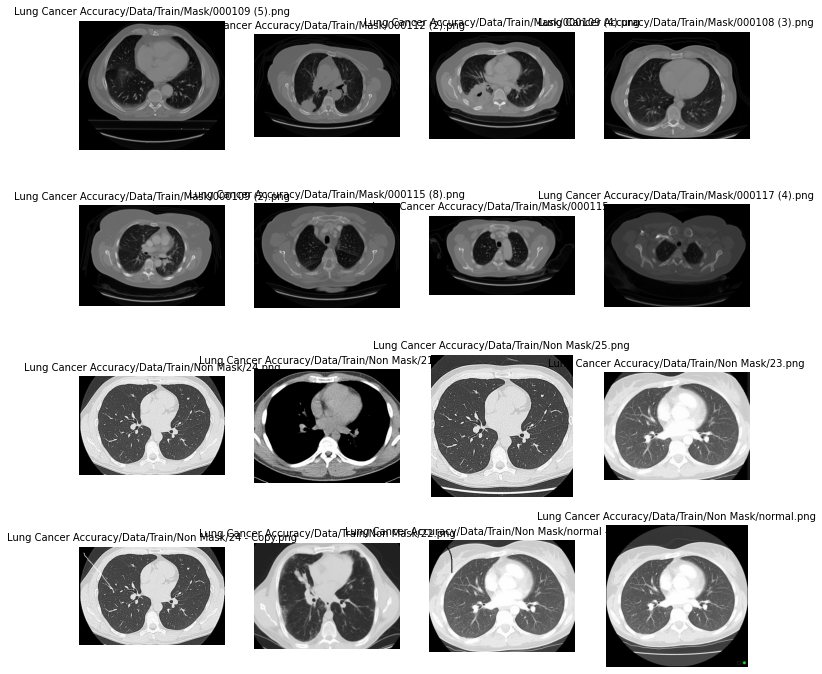

In [6]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_pics = mask_pic+nomask_pic

for i in range(0,len(merged_pics)):
  data = merged_pics[i].split('/',4)[4]
  sp = plt.subplot(4,4,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_pics[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()
  


In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 811 images belonging to 2 classes.
Found 811 images belonging to 2 classes.
Found 811 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [9]:
train_generator.image_shape

(150, 150, 3)

In [10]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
import tensorflow as tf

In [11]:
# Part 2 - Building the CNN
# Initialising the CNN
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
import tensorflow as tf
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[150,150,3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10368)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [13]:

history = cnn.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
26/26 [==============================] - 223s 8s/step - loss: 0.5446 - accuracy: 0.8286 - val_loss: 0.2591 - val_accuracy: 0.9125
Epoch 2/30
26/26 [==============================] - 12s 466ms/step - loss: 0.3313 - accuracy: 0.8940 - val_loss: 0.2602 - val_accuracy: 0.9445
Epoch 3/30
26/26 [==============================] - 12s 462ms/step - loss: 0.2448 - accuracy: 0.9088 - val_loss: 0.1505 - val_accuracy: 0.9199
Epoch 4/30
26/26 [==============================] - 12s 462ms/step - loss: 0.1446 - accuracy: 0.9346 - val_loss: 0.1212 - val_accuracy: 0.9593
Epoch 5/30
26/26 [==============================] - 12s 461ms/step - loss: 0.1323 - accuracy: 0.9396 - val_loss: 0.1216 - val_accuracy: 0.9408
Epoch 6/30
26/26 [==============================] - 12s 465ms/step - loss: 0.1300 - accuracy: 0.9433 - val_loss: 0.1004 - val_accuracy: 0.9605
Epoch 7/30
26/26 [==============================] - 12s 462ms/step - loss: 0.1257 - accuracy: 0.9507 - val_loss: 0.1096 - val_accuracy: 0.9494
E

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

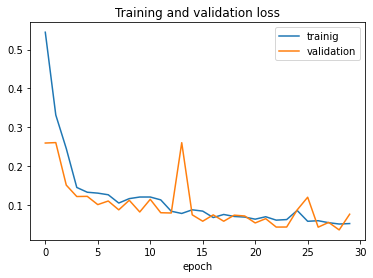

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

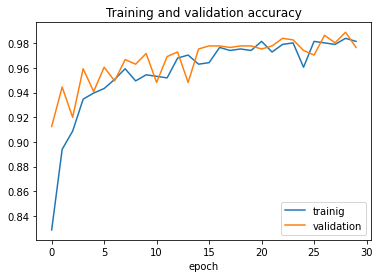

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

26/26 [==============================] - 112s 4s/step - loss: 0.0422 - accuracy: 0.9840
test acc :0.9839704036712646 test loss:0.04220636188983917


In [ ]:
model = Sequential()
model.add(Conv1D(15,60,padding='valid', activation='relu',input_shape=(150, 150, 3), strides = 1,  kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.1)))
model.add(MaxPooling1D(2,data_format='channels_last'))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Conv1D(30, 60, padding='valid', activation='relu',kernel_regularizer = regularizers.l1_l2(l1=0.1, l2=0.1), strides=1))
model.add(MaxPooling1D(4,data_format='channels_last'))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

NameError: ignored

In [ ]:
feature_vectors_model = Model(model.input, model.get_layer('dense_7').output)
dtc_features = feature_vectors_model.predict(train_generator)